In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, text

In [3]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

In [4]:
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produto = pd.read_csv(url_produto)
vendedores = pd.read_csv(url_vendedores)

In [5]:
engine = create_engine('sqlite:///:memory:')

In [6]:
pedidos.to_sql('pedidos', engine, index=False)
itens_pedidos.to_sql('itens_pedidos', engine, index=False)
vendedores.to_sql('vendedores', engine, index=False)
produto.to_sql('produtos', engine, index=False)

205

In [10]:
def sql_df(query):
    with engine.connect() as conexao:
        consulta = conexao.execute(text(query))
        resultado = consulta.fetchall()
    return pd.DataFrame(resultado, columns=consulta.keys())

In [11]:
query = '''SELECT * FROM PRODUTOS'''
sql_df(query)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248,Usado
...,...,...,...,...,...,...
200,14074,Camisa Amarela Laco,450,Carol Bassi,309858,Usado
201,33349,Vestido Listras Malha,270,Calvin Klein,307118,Usado
202,22568,Casaqueto Estampa Geometrica,245,Zara,244931,Usado
203,40508,Regata Bicolor Alcinha,245,Express,247166,Usado


In [13]:
query = '''SELECT * FROM ITENS_PEDIDOS'''
sql_df(query)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0
...,...,...,...,...,...,...,...,...
24522,25051,64127,63716,4,590,2360,BR-PE,472.0
24523,25052,37384,63999,4,700,2800,BR-RO,560.0
24524,25053,100932,64594,5,3900,19500,BR-RO,3900.0
24525,25054,3820,64811,3,139,417,BR-MA,83.4


calcular a receita total obtida com a venda de itens. Na tabela itens_pedidos, o valor total dos itens representa o cálculo da quantidade pelo valor unitário e pode ser considerado como a receita da venda.

In [34]:
query = '''SELECT PRODUTOS.PRODUTO, SUM(ITENS_PEDIDOS.QUANTIDADE) AS Quantidade, SUM(ITENS_PEDIDOS.VALOR_TOTAL) AS 'Valor de receita'
FROM ITENS_PEDIDOS, PRODUTOS 
WHERE ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
GROUP BY PRODUTOS.PRODUTO
ORDER BY 'Valor de receita' DESC'''

sql_df(query)

,produto,Quantidade,Valor de receita
0,Vestido Ziper Fendi,374,157080
1,Vestido Xadrez Pb,384,380160
2,Vestido Verde Estampa,423,164970
3,Vestido Textura Branco,470,277300
4,Vestido Seda Floral,428,179760
...,...,...,...
196,Blazer Alfaiataria Grafite,433,147220
197,Bermuda Listras Bolsos,402,44220
198,Bermuda Jeans Lavagem,395,138250
199,Bermuda Acetinada Preta,363,275880


identificar quais as 15 marcas que foram as mais pedidas por quantidades de venda. Busque mostrar essa lista em uma visualização, além de expor o nome das marcas.

In [48]:
query = '''SELECT PRODUTOS.MARCA, SUM(ITENS_PEDIDOS.QUANTIDADE) AS Quantidade
FROM ITENS_PEDIDOS, PRODUTOS 
WHERE ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
GROUP BY PRODUTOS.MARCA
ORDER BY Quantidade ASC'''

resultado = sql_df(query)
resultado

,marca,Quantidade
0,Track & Field,322
1,Talie Nk,325
2,Bcbgmaxzria,333
3,Express,342
4,All Saints Spitalfields,349
...,...,...
112,Banana Republic,2045
113,Le Lis Blanc,2479
114,Animale,4013
115,Mixed,5748


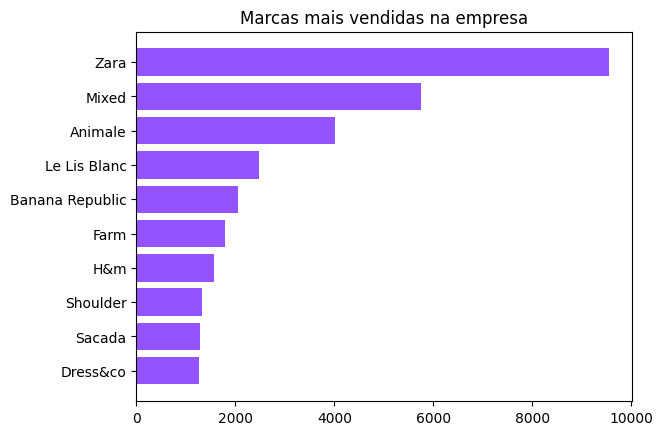

In [49]:
plt.barh(resultado['marca'][-10:], resultado['Quantidade'][-10:], color = '#9353FF')
plt.title('Marcas mais vendidas na empresa')
plt.show()